In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/Siddharth1698/Machine-Learning-Codes/main/knn_heart_disease/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data Cleansing**

In [48]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [49]:
df.shape

(303, 14)

In [50]:
df = df.dropna()

In [51]:
df.shape

(303, 14)

**Outliers**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


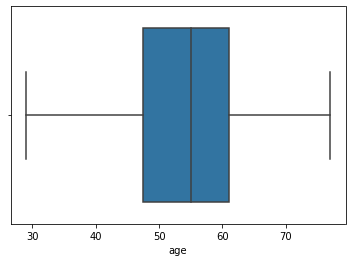

In [53]:
sns.boxplot(df['age'])

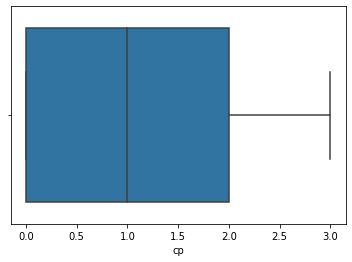

In [54]:
sns.boxplot(df['cp'])

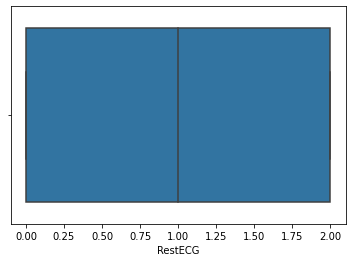

In [29]:
sns.boxplot(df['RestECG'])

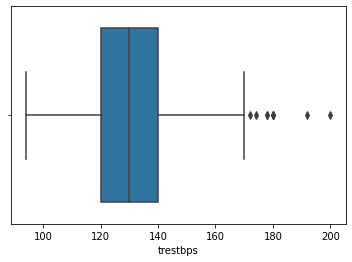

In [55]:
sns.boxplot(df['trestbps'])

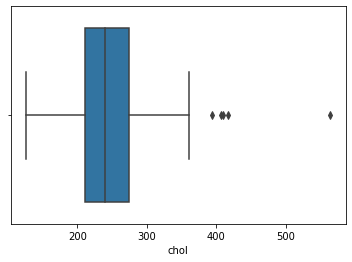

In [56]:
sns.boxplot(df['chol'])

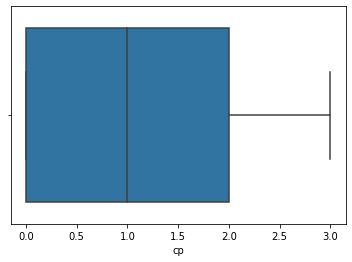

In [57]:
sns.boxplot(df['cp'])

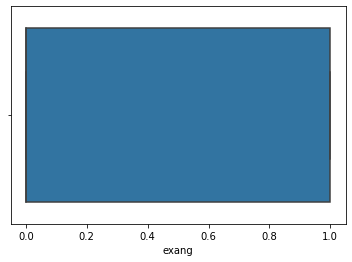

In [58]:
sns.boxplot(df['exang'])

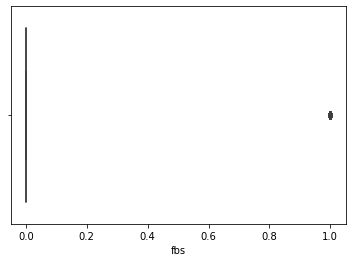

In [59]:
sns.boxplot(df['fbs'])

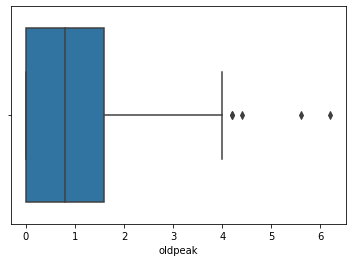

In [60]:
sns.boxplot(df['oldpeak'])

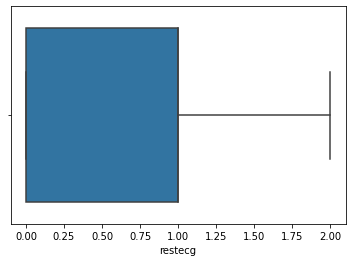

In [61]:
sns.boxplot(df['restecg'])

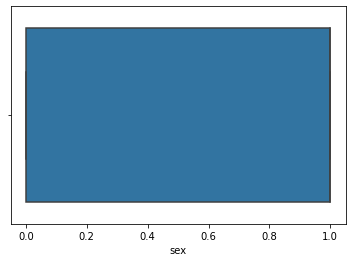

In [62]:
sns.boxplot(df['sex'])

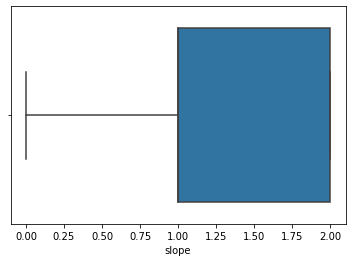

In [63]:
sns.boxplot(df['slope'])

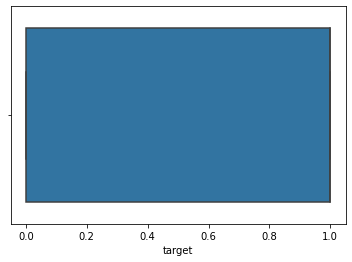

In [64]:
sns.boxplot(df['target'])

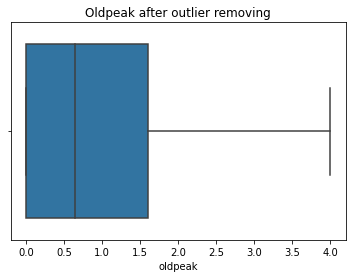

In [65]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'oldpeak')
sns.boxplot(df['oldpeak'])
plt.title("Oldpeak after outlier removing")
plt.show()

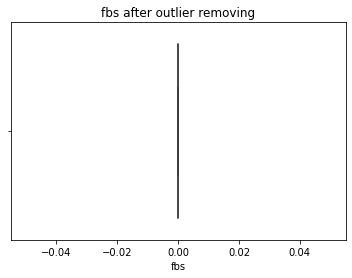

In [66]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'fbs')
sns.boxplot(df['fbs'])
plt.title("fbs after outlier removing")
plt.show()

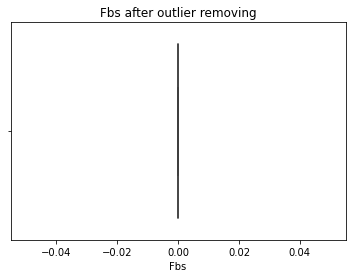

In [35]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'Fbs')
sns.boxplot(df['Fbs'])
plt.title("Fbs after outlier removing")
plt.show()

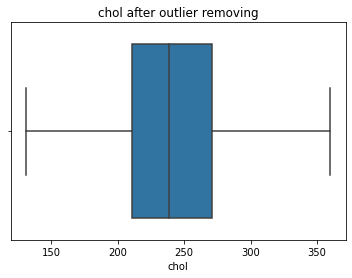

In [67]:

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'chol')
sns.boxplot(df['chol'])
plt.title("chol after outlier removing")
plt.show()

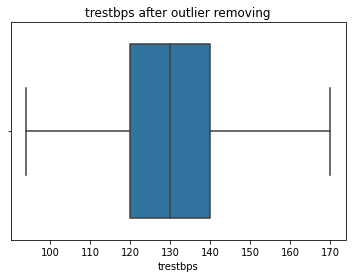

In [68]:


def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'trestbps')
sns.boxplot(df['trestbps'])
plt.title("trestbps after outlier removing")
plt.show()

# Implementation of K-Nearest Neighbour

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

The target column explains if the person is suffering from heart disease or not 

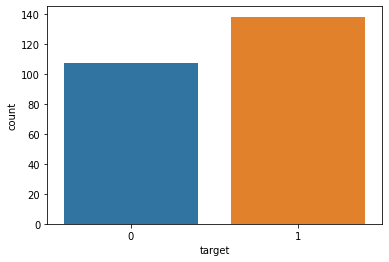

In [70]:
sns.countplot(df['target'])

In [72]:
x= df.iloc[:,0:13].values 
y= df['target'].values


In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [74]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

This step is common for all ML tasks and here I have just split the dataset and scaled it for further processing.

**Checking for the best value of  k:**

Minimum error:- 0.14516129032258066 at K = 24


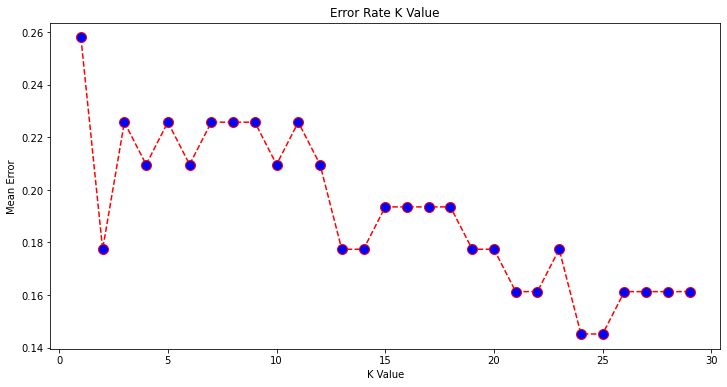

In [75]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

**Apply K-NN Algorithm**

In [76]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [77]:
accuracy_score(y_test, y_pred)

0.7741935483870968

**Applications of KNN:**</br></br>
Now we know about KNN and how to implement them. Let’s see some scenarios where KNN is used.

1. Music Recommendation System: Probably any recommendation system. But, in the case of music systems, we have a large amount of music coming and there is a high chance that we are getting the same music with different versions being recommended, These could be analyzed using KNN. We could even use it to see which music is of the person’s liking.

2. Outlier Detection: KNN has the ability to identify outliers.

3. Similar documents can be identified using KNN Algorithm.